[서울시 본청 업무추진비 목록> 데이터셋> 공공데이터 | 서울열린데이터광장](https://data.seoul.go.kr/dataList/OA-22156/S/1/datasetView.do)

In [1]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib

In [2]:
df = pd.read_csv("data/seoul-expense.csv", encoding="cp949")
df.shape

(51428, 18)

In [3]:
df.head(2)

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,집행금액,비목
0,30267889,2023년 12월 서울시본청 주택정책실 주택공급기획관 공동주택지원과 업무추진비 - ...,공동주택지원과,02-2133-7134,박혜은,2024-02-02,2023,12,https://opengov.seoul.go.kr/expense/30267889,NaN,주택정책실 주택공급기획관 공동주택지원과,2023-12-20 11:45,서궁(종로구 새문안로 35-20),주택재건축 정비계획 결정 및 정비구역 지정 관련 간담회 비용 지급,공동주택지원과장 외 2명,카드,29570,부서
1,30267889,2023년 12월 서울시본청 주택정책실 주택공급기획관 공동주택지원과 업무추진비 - ...,공동주택지원과,02-2133-7134,박혜은,2024-02-02,2023,12,https://opengov.seoul.go.kr/expense/30267889,NaN,주택정책실 주택공급기획관 공동주택지원과,2023-12-14 13:15,잼배옥(중구 서소문동 64-4),공동주택 장기수선 제도개선 방안 수립용역 준공 관련 간담회 비용 지급(2),공동주택지원과장 외 4명,카드,14000,부서


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51428 entries, 0 to 51427
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   문서고유id       51428 non-null  int64 
 1   제목           51428 non-null  object
 2   부서명          51428 non-null  object
 3   전화번호         51428 non-null  object
 4   작성자          51428 non-null  object
 5   등록일          51428 non-null  object
 6   해당년도         51428 non-null  int64 
 7   해당월          51428 non-null  int64 
 8   문서url        51428 non-null  object
 9   구분(시장실만 사용)  717 non-null    object
 10  전체부서명        51428 non-null  object
 11  집행일시         51428 non-null  object
 12  집행장소         51206 non-null  object
 13  집행목적         51428 non-null  object
 14  집행대상         51316 non-null  object
 15  결제방법         51428 non-null  object
 16  집행금액         51428 non-null  int64 
 17  비목           51428 non-null  object
dtypes: int64(4), object(14)
memory usage: 7.1+ MB


In [5]:
df.describe().round(2)

,문서고유id,해당년도,해당월,집행금액
count,51428.00,51428.00,51428.00,51428.00
mean,29053914.24,2023.08,6.20,127246.27
std,780336.54,0.26,3.69,286999.45
min,27741766.00,2023.00,1.00,0.00
25%,28396801.00,2023.00,3.00,55000.00
50%,29028993.00,2023.00,6.00,90000.00
75%,29802955.00,2023.00,9.00,150000.00
max,30350224.00,2024.00,12.00,45526140.00


In [6]:
df.describe(include="object")

,제목,부서명,전화번호,작성자,등록일,문서url,구분(시장실만 사용),전체부서명,집행일시,집행장소,집행목적,집행대상,결제방법,비목
count,51428,51428,51428,51428,51428,51428,717,51428,51428,51206,51428,51316,51428,51428
unique,2213,252,330,300,222,2213,2,253,35538,18109,34927,10300,3,4
top,2023년 12월 서울시본청 행정국 총무과 업무추진비 - 전체,총무과,02-2133-6412,김두영,2023-04-10,https://opengov.seoul.go.kr/expense/30115434,시정 관련 간담회 등,행정국 총무과,1970-01-01 09:00,삼우정(중구 서소문로 134-12),기강감찰 행정소요경비 지급,디자인정책관 외 3명,카드,시책
freq,285,3086,1893,2048,1353,285,377,3227,18,287,376,124,37336,39320


In [7]:
df["집행일시"] = pd.to_datetime(df["집행일시"])
df["집행연도"] = df["집행일시"].dt.year
df["집행월"] = df["집행일시"].dt.month
df["집행일"] = df["집행일시"].dt.day
df["집행요일"] = df["집행일시"].dt.dayofweek

In [8]:
df.describe()

,문서고유id,해당년도,해당월,집행일시,집행금액,집행연도,집행월,집행일,집행요일
count,5.142800e+04,51428.000000,51428.000000,51428,5.142800e+04,51428.000000,51428.000000,51428.000000,51428.000000
mean,2.905391e+07,2023.075815,6.201505,2023-07-13 22:24:10.147779584,1.272463e+05,2023.057245,6.199872,16.009722,2.092965
min,2.774177e+07,2023.000000,1.000000,1970-01-01 09:00:00,0.000000e+00,1970.000000,1.000000,1.000000,0.000000
25%,2.839680e+07,2023.000000,3.000000,2023-04-11 12:50:45,5.500000e+04,2023.000000,3.000000,9.000000,1.000000
50%,2.902899e+07,2023.000000,6.000000,2023-07-19 13:22:30,9.000000e+04,2023.000000,6.000000,16.000000,2.000000
75%,2.980296e+07,2023.000000,9.000000,2023-11-01 12:20:15,1.500000e+05,2023.000000,9.000000,23.000000,3.000000
max,3.035022e+07,2024.000000,12.000000,2024-01-31 21:57:00,4.552614e+07,2024.000000,12.000000,31.000000,6.000000
std,7.803365e+05,0.264704,3.685438,NaN,2.869994e+05,1.027473,3.685960,8.634498,1.415798


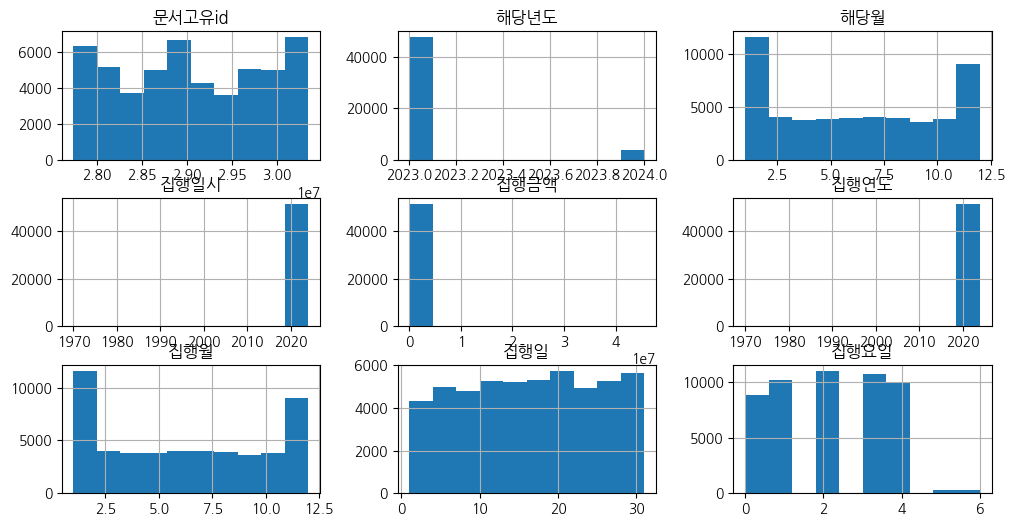

In [9]:
df.hist(figsize=(12, 6));

In [10]:
df["집행장소"].value_counts().head(10)

집행장소
삼우정(중구 서소문로 134-12)             287
서울시청 간담회장(서울특별시 중구 세종대로 110)    208
오리마당(중구 세종대로 92)                182
우도일식(중구 세종대로 124)               169
삼우정(서울 중구 서소문로 134-12)          158
구이구이(중구 을지로 6)                  135
곰국시집(중구 무교로 24)                 126
곰국시집(서울 중구 무교로 24)              125
푸에르코 광화문(서울특별시 중구 무교로 21)       123
월매네남원추어탕(중구 서소문로 109-8)         113
Name: count, dtype: int64

In [11]:
df["집행장소"].map(lambda x : str(x).replace("(주)", "<주>").split("(")[0])

0             서궁
1            잼배옥
2            잼배옥
3        브이아이피참치
4           북창갈비
          ...   
51423        삼우정
51424         라밥
51425       오리마당
51426        삼우정
51427        삼우정
Name: 집행장소, Length: 51428, dtype: object

In [12]:
df["상호명"] = df["집행장소"].str.replace(r"\)([^(\d)]+)", "").str.split("(", expand=True)[0]
df["상호명"].head(5)

0         서궁
1        잼배옥
2        잼배옥
3    브이아이피참치
4       북창갈비
Name: 상호명, dtype: object

In [13]:
df["상호명"].value_counts()

상호명
                1666
삼우정              628
우도일식             449
오리마당             424
구이구이             389
                ... 
한국문화재재단 고궁뜨락       1
카페 소확행             1
옛날장터               1
별진화로구이             1
진오봉참치              1
Name: count, Length: 8613, dtype: int64

In [14]:
df.loc[df["상호명"] == "", "집행장소"]

5                (주)엔엠에프(중구 남대문로 1길 37)
14        (주)에스씨케이 컴퍼니(서울 중구 퇴계로 100 ,)
15               (주)강가(서울 중구 세종대로 136,)
23         (주)쿠프마케팅(서울 성동구 성수이로10길 14,)
35             (주)쿠프마케팅(성동구 성수이로10길 14)
                      ...              
51376                (주)이디야국립중앙도서관디지털관점
51378                          (주)포비아워스
51390     (주)바닷가작은부엌 덕수궁점(서울 중구 덕수궁길 7)
51393    (주)바닷가작은부엌 덕수궁점(서울 중구 덕수궁길 7,)
51396     (주)바닷가작은부엌 덕수궁점(서울 중구 덕수궁길 7)
Name: 집행장소, Length: 1666, dtype: object

In [15]:
df["결제방법"].value_counts()

결제방법
카드      37336
제로페이    13620
현금        472
Name: count, dtype: int64

In [16]:
df["결제방법"].unique()

array(['카드', '제로페이', '현금'], dtype=object)

<Axes: >

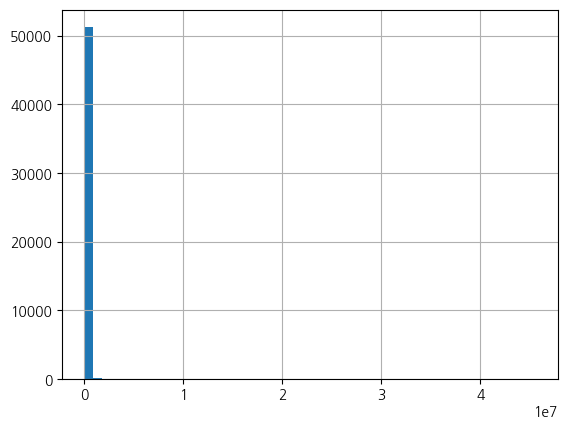

In [17]:
df["집행금액"].hist(bins=50)

In [18]:
 df["집행금액"].describe().round(2)

count       51428.00
mean       127246.27
std        286999.45
min             0.00
25%         55000.00
50%         90000.00
75%        150000.00
max      45526140.00
Name: 집행금액, dtype: float64

In [19]:
df[df["집행금액"] > 40000000]

,문서고유id,제목,부서명,전화번호,작성자,등록일,해당년도,해당월,문서url,구분(시장실만 사용),...,집행목적,집행대상,결제방법,집행금액,비목,집행연도,집행월,집행일,집행요일,상호명
1048,30115407,2023년 12월 서울시본청 서울특별시장 업무추진비 - 기관운영 시책추진,시장실,02-2133-6033,전세용,2024-01-10,2023,12,https://opengov.seoul.go.kr/expense/30115407,현업-우수부서 격려 등,...,연말 현안업무 추진직원 격려 다과비 지원,본청 167개 부서,카드,45526140,기관,2023,12,20,2,NaN


In [20]:
df["결제방법"].value_counts()

결제방법
카드      37336
제로페이    13620
현금        472
Name: count, dtype: int64

In [21]:
df.groupby("결제방법")["집행금액"].describe().style.format("{:,.0f}")

,count,mean,std,min,25%,50%,75%,max
결제방법,,,,,,,,
제로페이,"13,620","120,506","131,943",100,"58,000","89,000","144,000","5,280,000"
카드,"37,336","126,471","291,942","1,000","54,500","92,000","151,000","45,526,140"
현금,472,"383,039","1,291,238",0,"50,000","50,000","100,000","9,689,400"


In [22]:
df["비목"].value_counts()

비목
시책    39320
부서     5952
기관     5799
정원      357
Name: count, dtype: int64

In [23]:
pd.crosstab(df["결제방법"], df["비목"]).style.format("{:,.0f}")

비목,기관,부서,시책,정원
결제방법,,,,
제로페이,980,"1,140","11,483",17
카드,"4,382","4,800","27,834",320
현금,437,12,3,20


In [24]:
pd.crosstab(df["결제방법"], df["비목"], values=df["집행금액"], aggfunc="mean").style.format("{:,.0f}")

비목,기관,부서,시책,정원
결제방법,,,,
제로페이,"219,911","192,095","104,928","111,453"
카드,"207,856","122,128","113,552","200,911"
현금,"397,967","213,683","102,167","200,611"


In [25]:
df["집행목적"].value_counts().head(20)

집행목적
기강감찰 행정소요경비 지급               376
시정 현안 관련 업무협의 간담회            192
시정 소통 협력을 위한 유관기관 관계자 간담회    177
시정 현안 관련 의견수렴 간담회            160
시책사업 추진 관련 의견수렴 간담회          146
업무 협의 비용 지급                  104
시정 현안 관련 유관기관 간담회             96
유관기관 등 업무협력 간담회               96
시책사업 추진 관련 업무협의 간담회           96
시정 소통 협력을 위한 언론 간담회           92
마케팅 전략 기획 관련 의견수렴 간담회         91
시정 유관기관 업무협력 간담회              87
시정 추진 유관기관 업무협력 간담회           86
현안 검토 관련 의견수렴 간담회             79
시책사업 관련 의견수렴 간담회              77
언론사 협력 시정정보제공 검토 간담회          76
현안업무추진 직원 격려 비용 지급            73
현안 관련 유관단체 간담회                72
공직기강 확립 관련 관계자 간담회            71
시정 소통 협력을 위한 의회 관계자 간담회       70
Name: count, dtype: int64